When we have assembled a network from our Social Media data, we're looking at a single snapshot of a set of entities and the relationships between them. A common question of interest to network researchers is *why* the network looks the way it looks. Take, for example, a network of Facebook friends. Why do we have *this particular arrangement* of friends and friendships? Why do some users have many friends, and why do others have few friends? Why do some users have high eigenvector centrality or betweenness centrality? What caused certain people to be central and others to be peripheral?

In other words: what processes formed the graph we are currently looking at?

We take the traditional scientific approach to resolving this question: we form a hypothesis and we see how will it fits with what we have observed.

Our hypothesis concerns how links between nodes come into being. Let's take for example, a hypothesis that **all friendships are formed randomly with a certain probability between two nodes**. Random Person A and Random Person B are nodes, but they are not facebook friends. They have a 32\% chance of becoming Facebook friends. If this probability is met, they become friends, otherwise, they don't. 

Obviously your intuition might kick in, and you might from your own Facebook experience observe that no, that is indeed *not* how people become Facebook friends in the real world. And you're probably right. But it doesn't hurt to *test* this hypothesis and see how will it stands up. 

The idea behind **Network Models** is that you generate a random graph according to a set of rules. This set of rules is our network model - in the example above, our model is **relationships are formed randomly with a set probability**. Then, you compare the random graph to your real-world graph. The more similar they are, the more likely that your model estimates the *true process* that created the real-world model. If they're dissimilar, you can discard your hypothesis and seek another.

Before we generate random graphs, let's discuss a number of *graph-wide metrics* that will aid us in our comparison. 

# Degree Distribution

When we look at the degree distribution of a graph, we're trying to figure out *how many nodes* in a graph have *a certain degree*. How many nodes have a low degree? How many have a high degree? How many have a *very* high degree?

Let's take a look at a subset I made of the Twitter dataset from the Social Computing Data Repository at ASU. This dataset contains 11,316,811 nodes and 85,331,846 edges, so it is purely staggering in its size, something far beyond what most of us can handle on our home computers. I therefore took a random subset of it that has 28,537 nodes and 3,004,415 edges. This file will be available on Canvas.

Note that this *should* be a directed network, as it's a network of who follows who on Twitter, but I saved it and am loading it as an undirected network to simplify things for this demo.

In [1]:
import numpy as np
np.random.seed(3057) # Set random seed since we'll be doing random stuff later.

import networkx as nx
G = nx.read_graphml("twitgraph.graphml")

In [2]:
G.number_of_nodes()

28537

In [3]:
G.number_of_edges()

3004415

You'll recall that you can get the degree of a node by using the graph method ``degree`` and passing it the name of a node. This Twitter network has be anonymized, so the names of the nodes are integers (but the integers are strings in the Graph). Using this techinque, we can see that the degree of node ``'5729987'`` is 78.

In [4]:
some_node = '5729987'
G.degree(some_node)

78

We can actually pass multiple nodes to ``degree`` by passing it a list of node names. We get a dictionary with the node names as keys and their corresponding degree as values. 

In [5]:
G.degree(['5729987', '1958438'])

{'1958438': 2, '5729987': 78}

So let's simply pass degree a list of all the nodes:

In [6]:
all_nodes = G.nodes()
all_degrees = G.degree(all_nodes)

The variable ``all_degrees`` is a dictionary, with the keys as node names and the values as their degrees. We're interested only in the degrees right now so let's pull out just the values. We can use the ``.values()`` method on the dictionary to do that, but we also have to take the additional step of converting it into a list.

In [7]:
all_degrees = list(all_degrees.values())

In [8]:
all_degrees[:25]

[6,
 14,
 660,
 42,
 248,
 134,
 4,
 317,
 6,
 4,
 105,
 1151,
 284,
 3,
 1,
 8,
 289,
 136,
 13,
 656,
 330,
 8,
 567,
 594,
 840]

Let's try to get a sense of what kind of degrees we have. The minimum is not too surprising:

In [9]:
import numpy as np
np.min(all_degrees)

1

The minimum degree a node can have is 1 (otherwise it wouldn't be a part of the graph at all). Here's the max: 

In [10]:
np.max(all_degrees)

12240

There's someone in this network with an impressive 12,240 followers.

In [11]:
np.median(all_degrees)

51.0

The median degree is 51. Note this is much, much closer to the minimum than the maximum, so we're probably dealing with a very skewed distribution. 

Let's visualize this distribution. Here's how will do it:

The **x-axis** will represent a degree, starting with 1 and incrementing by 1: 1, 2, 3, and s on until 12,240.

The **y-axis** will plot the *number of nodes that have that corresponding degree on the x-axis*. How many nodes have a degree of 1? How many nodes have a degree of 2? And so on.

NetworkX provides us with a function called ``degree_histogram`` that will do this counting for us. It returns a list where the element at index 0 is a count of how many nodes have a degree of 0, the element of index 1 indicates how many nodes have a degree of 1, and so on. 

In [12]:
dh = nx.degree_histogram(G)

In [13]:
dh[:5]

[0, 3327, 1454, 968, 713]

There are 0 nodes that have a degree of 0 (which makes sense), 3327 nodes with a degree of 1, 1454 nodes with a degree of 2, and so on. Let's plot this.

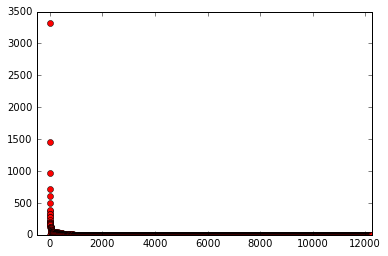

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlim(-500, max(all_degrees))
plt.plot(dh, "ro")

Let's take a close look at this visualization. There are a lot of nodes with a degree of 1. Then, there are fewer nodes with a degree of 2. And fewer with a degree of 3. As we increase the degree, the number of nodes with degree decrease *so quickly* that in the visualization above the dots look like they form a "L" shape, that at first goes straight down, and then cuts to the left near the bottom of the *y-axis*.

This is not entirely helpful, as it basically tells us "a lot of nodes have a low degree, a few nodes have high degrees."

One way we can clarify the visualization is to **take the logarithm of both axes**. In general, if we suspect that we're dealing with a multiplicative process, if we take the logarithm of the values we can turn it into an additive process. We have suspicions that there is some sort of multiplicative process going on here because the number of nodes with a degree of 2 seems to be a bit more than half of the number of nodes with a degree of 1. The number of nodes with a degree of 2 seems a bit more than half of the number of nodes with degree 1. As we increase the degree, we seem to get a count that is a *fixed proportion* of the previous count. 

Let's plot the same data, but on logarithmic axes.

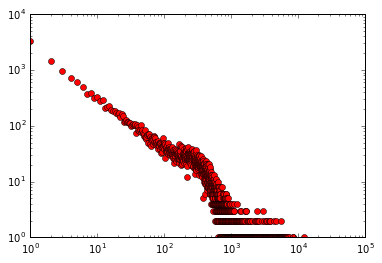

In [15]:
plt.xscale("log")
plt.yscale("log")
plt.plot(dh, "ro")

We can see that when we plot the degree distribution on log-log axes, we have *something* approximating a line. 

In statistics, when we see a line on a log-log plot, this constitutes *some* evidence that the phenomena we are observe follows a [*power law distribution*](https://en.wikipedia.org/wiki/Power_law), where 

$$
p_k = C \cdot \frac{1}{k^{\alpha}}
$$

The number of nodes with degree $k$ is proportional to some constant $C$ times one over $k$ raised to the $\alpha$. This formula, if true, explains the rapid dropoff: as we increase the degree $k$, the number of nodes with degree $k$ drops off rapidly as $k$ is exponentiated by some number $\alpha$.

The power law distribution seems to be displayed in a large number of real world social networks, but I feel obligated to mention here that nowadays, generall speaking, "finding the powerlaw" has become somewhat of a trend and there are a number of statisticians, notably Cosma Shalizi, who are doing deeper reserach into the issue and are discovering that in our zeal and excitement we are finding power laws where there aren't any. [Here's a link summarizing Shalizi's criticisms](http://bactra.org/weblog/491.html). For now, the important takeaway is that degree distributions in real-world networks are heavily right-skewed. 

# Clustering Coefficient

The clustering coefficient for a given node tells us how dense the connections surrounding that node are. It's a good measure of how connected a certain part of the graph is. 

Let's take a look at the following network:

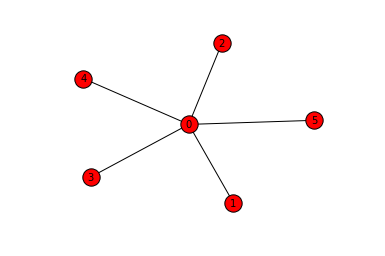

In [16]:
sample = nx.generators.star_graph(5)

pos = nx.spring_layout(sample, iterations=100)
nx.draw_networkx_nodes(sample, pos, node_size = 300)
nx.draw_networkx_edges(sample, pos)
nx.draw_networkx_labels(sample, pos, font_size=10)
plt.axis("off")
plt.show()

Here, we have a hub node, 0, and 5 other nodes that are connected to node 0 but *no other nodes*. Imagine this as a social network. 0 might be a boss, who commands the other 5 nodes, but there are no other connections: the 5 employees don't know or contact eahch other, they are isolated. 

This above configuration, which known as a **star graph**, is highly unusual in real-world social networks. 

Let's explore why. A star graph is composed of multiple open triangles. An open triangle is a configuration of 3 nodes that looks like this:

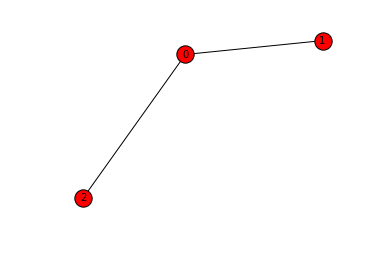

In [17]:
sample = nx.generators.star_graph(2)

pos = nx.spring_layout(sample, iterations=100)
nx.draw_networkx_nodes(sample, pos, node_size = 300)
nx.draw_networkx_edges(sample, pos)
nx.draw_networkx_labels(sample, pos, font_size=10)
plt.axis("off")
plt.show()

0 knows 1, 0 knows 2, but 1 and 2 don't know each other. In real world sitautions, we would expect that at least *some* of those open triangles would become *closed*. Think about a network of Facebook friends. If Etta knows Janek, and Etta also knows Sofia, there's some probability that Etta will introduce Janek to Sofia and *close the triangle*.

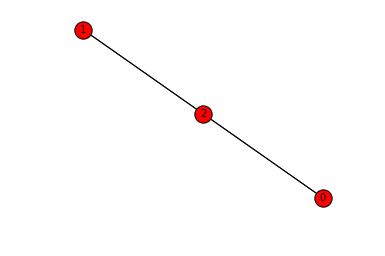

In [18]:
sample = nx.generators.complete_graph(3)

pos = nx.spring_layout(sample, iterations=100)
nx.draw_networkx_nodes(sample, pos, node_size = 300)
nx.draw_networkx_edges(sample, pos)
nx.draw_networkx_labels(sample, pos, font_size=10)
plt.axis("off")
plt.show()

The clustering coefficient for a *given node* is the number of *closed triangles* divided by the number of *possible closed triangles*. 

We can find the clustering coefficient of a target node with the networkx function ``clustering``. 

In a star structure, the clustering coefficient of the hub node is 0, as there are no possible triangles:

In [19]:
from networkx.algorithms import clustering
sample = nx.generators.star_graph(2)
clustering(sample, 0)

0.0

Let's artificially close one of the triangles in the star network.

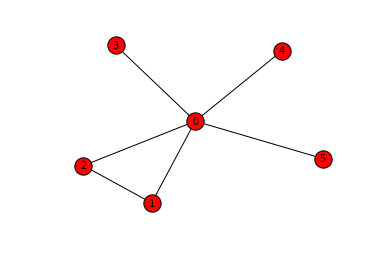

In [20]:
sample = nx.generators.star_graph(5)
sample.add_edge(1, 2)
pos = nx.spring_layout(sample, iterations=100)
nx.draw_networkx_nodes(sample, pos, node_size = 300)
nx.draw_networkx_edges(sample, pos)
nx.draw_networkx_labels(sample, pos, font_size=10)
plt.axis("off")
plt.show()

What's the clustering coefficient of node 0?

In [21]:
clustering(sample, 0)

0.1

It's 0.1, because there is one existing triangle out of 10 potential triangles that could be formed among 0's neighbors. 

Now let's look at a graph where *everyone* knows *everyone else*.

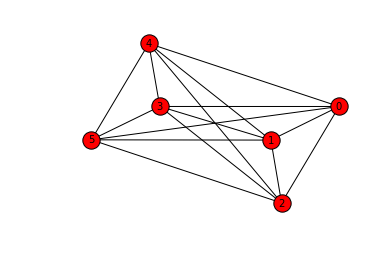

In [22]:
sample = nx.generators.complete_graph(6)
pos = nx.spring_layout(sample, iterations=100)
nx.draw_networkx_nodes(sample, pos, node_size = 300)
nx.draw_networkx_edges(sample, pos)
nx.draw_networkx_labels(sample, pos, font_size=10)
plt.axis("off")
plt.show()

In [23]:
clustering(sample, 0)

1.0

Now the clustering coefficient for node 0 is 1.0: of all the possible triangles that could be formed, they *are* formed.

The clustering coefficient is a *node level metric*. In a real-world network, some may have high clustering, some may have low clustering. We turn this into a *network level metric* by calulating the clustering coefficient for all nodes in the graph and taking their average. 

Let's find the average clustering coefficient for our twitter network. Note that this is a *computationally expensive operation*, so in many large networks, computing the clustering coefficient for all nodes is infeasible. NetworkX therefore provides a function called ``average_clustering`` that **estimates** the average clustering coefficient by only sampling some of the possible triangles. The number of samples is indicated by the optional parameter ``trials``. The higher the trials, the more accurate the estimate, the longer it may take to calculate.

In [24]:
from networkx.algorithms.approximation import average_clustering

acc = average_clustering(G, trials=10000)
acc

0.2369

We estimate the average clustering coefficient for our Twitter network is around 0.24. That for a given node, 24% of of the potential triangles that could be formed among its neighbors do actually exist.

# Shortest Path

When we take two nodes, there are many paths one can take along the network to get from one to the other; however, one of these paths must be the *shortest*. 

To calculate the shortest path between two nodes, we can use a NetworkX function called shortest path.

In [25]:
from networkx.algorithms import shortest_path

In [26]:
shortest_path(G, '5729987', '1958438')

['5729987', '5906802', '1369086', '1958438']

It takes 3 hops to get from ``'5729987'`` to node ``'1958438'``. 

Like with the clustering coefficient, we can calculate the shortest path between all possible pairs of nodes and calculate the *average shortest path*, which gives us an intuition about the "diameter" of the network. If you'll recall the game "6 Degrees of Kevin Bacon", if you take an actor network and find that the average shortest path is less than 6, then for almost any actor you should be able to get to Kevin Bacon in less than 6 steps.

Also similar to the average clustering coefficient, calculating this for the entire graph, unfortunately, is infeasible when your number of nodes is large. With 28,537 nodes, there would be 407,165,916 paths we would have to calculate. Once again, we'll have to only *sample* pairs of nodes, and then estimate the average shortest path using those samples.

Sadly, NetworkX does not have a function that can sample, but I'll write a function here that will do the work for us. 

In [27]:
from networkx.algorithms import shortest_path
import numpy as np

def estimate_asp(G, trials=100000):
    nodes = G.nodes()
    sources = np.random.choice(nodes, trials)
    destinations = np.random.choice(nodes, trials)
    path_lengths = []
    for i in range(len(sources)):
        this_path = shortest_path(G, sources[i], destinations[i])
        if this_path:
            path_lengths.append(len(this_path)-1)
    return np.mean(path_lengths)

In [28]:
asp = estimate_asp(G)
asp

2.68858

With 100,000 samples, we estimate the shortest path length to be 2.69. The diameter of this Twitter network is actually quite small; in about 3 hops, you can probably get from a given node to almost every other node in the network.

# Proposing a model and comparing it to a real-world network

Let's come up with some models from graph creation, generate a random network using that model, and compare it with our real world Twitter network in terms of degree distribution, clustering coefficient, and average shortest path.

Above, I proposed a (probably wrong) graph model where we create a link between two nodes randomly, with a certain probability. When we think about how we follow Twitter accounts or make friends  on Facebook, this definitely doesn't seem to be how the process works. But for science's sake, let's make a network that follows these rules and see how it compares to our real world network.

This type of graph is known as an Erdos-Renyi graph. To create a graph, we need two numbers: the number of nodes, and the probability of a link between the nodes. We'll use the same number of nodes as our real world graph, and for the probability of an edge, $p$, we'll use the formula:

$$
p = \frac{c}{n-1}
$$

where $c$ is the average degree of our real-world network and $n$ is the number of nodes in our real world network.

In [29]:
p = np.mean(all_degrees)/(G.number_of_nodes() - 1)

In [30]:
p

0.0073788470054551416

In [31]:
erg = nx.generators.erdos_renyi_graph(G.number_of_nodes(), p)

## Degree Distribution

Let's look at the degree distribution.

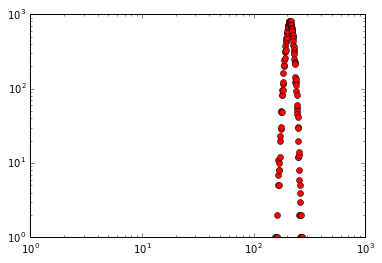

In [32]:
ergdh = nx.degree_histogram(erg)
plt.xscale("log")
plt.yscale("log")
plt.plot(ergdh, "ro")

We can see here that the degree distribution of this random Erdos-Renyi graph looks *nothing* like the distribution of our real world graph. This is a pretty strong hint that this isn't the right idea. 

## Clustering Coefficient

Now let's look at the clustering coefficient.

In [33]:
average_clustering(erg, trials=10000)

0.0078

The average clustering coefficient of our Twitter graph was 0.24, while for the Erdos-Renyi graph it's 0.0051. Again, not a good match. 

Finally, let's see what the average shortest path is. 

In [34]:
estimate_asp(erg)

2.2027800000000002

Okay, so the estimated average shortest path for our random network is 2.20, while while for the real-world network it was 2.69. This is actually in the ball park.

A completely random graph does *not* capture the degree distribution of our real-world network, nor does it capture how clustered our real-world network tends to be. 

In our real-world network, most people have few followers, but some have many, so clearly there is some sort of preference being exercised when follower relationships are made, e.g. it's **not random**.

However, both the random Erdos-Renyi network are networks with short average path lengths. So perhaps we can conclude there is *some element of randomsity in the development of following relationships*, and therefore to that extent this explains why social networks tend to have short path lengths.

# Small-World Networks

The problem with the Erdos-Renyi graph is that it approximated the clustering and the degree distribution of the real-world graph poorly. There is something true about the idea that *sometimes* relationships in human social networks form randomly, but there is something broken with the idea that *all* relationships are formed randomly.

To tackle this, let's turn to another graph model called the Small-World Model, developed by Watts and Strogatz in 1997.

This model is motivated by the idea that most people *begin with an essential small-world network*. Everyone has family members, everyone has a core of friends. These "given" relationships means that certain people will have *some* sort of core of relationships, while there are *some* relationships that are formed randomly.

To make a small world network, you start with a set of $n$ nodes. Arrange these nodes in a ring. Then, depending on some parameter $k$ that has an even-number value, connect each node to the $k/2$ neighbors to its left, and $k/2$ neighbors to its right. This is known as a *ring lattice network*. Due to this "set-up rule", each node will have some minimum "community" from the beginning.

Then, visit each existing edge and *rewire* it with a probability $p$. With a low $p$, there will be some randomness, but the "core communities" in the lattice graph will remain. With a maximum value of $p=1$, the graph simply becomes a random graph. Here's an image that illustrates:

<img src="http://www.nature.com/nature/journal/v393/n6684/images/393440aa.eps.2.gif">

Let's simulate our Twitter graph with a Watts-Strogatz small-world graph. We need three parameters:

1. $n$, the number of nodes.
2. $k$, the number of neighbors to connect to in the original lattice graph.
3. $p$, the probability of rewiring. 

$n$, of course, is simply the number of nodes in our twitter Graph.

In [35]:
n = G.number_of_nodes()

For $k$, we'll use the average degree of our Twitter Graph.

In [36]:
k = np.mean(all_degrees)
k

210.56277814766793

We want $k$ to be an even number, so we'll floor it:

In [37]:
k = np.floor(k)
k = int(k)
k

210

Finally, to derive a value of $p$ from our Graph, we have to use some elaborate math that I won't go into today. If you're interested in learning about it, check out section 4.3 in Zafarani's Social Media Mining textbook, which is available on canvas.

In [38]:
p = 1 - ((acc*4*(k-1))/(3*(k-2)))**(1/3)

We can use a NetworkX generator to create a Watts Strogatz small-world network, passing the 3 parameters we just calculated. 

In [39]:
wsg = nx.generators.watts_strogatz_graph(n, k, p)

The variable ``wsg`` is now a Watts-Strogatz graph that is attempting to mimic our real-world Twitter graph. If our Twitter graph developed along the same lines as a Watts-Strogatz graph, they should be similar in terms of degree, clustering coefficient, and average shortest path length.

## Degree Distribution

First, let's check out the degree distribution.

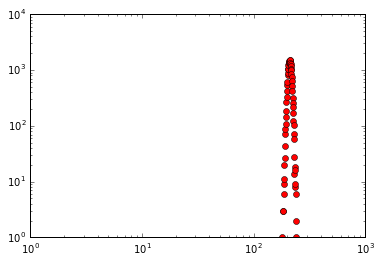

In [40]:
wsgdh = nx.degree_histogram(wsg)
plt.xscale("log")
plt.yscale("log")
plt.plot(wsgdh, "ro")

Like with the random Erdos-Renyi graph, the degree distribution does not at all look like the degree distribution of our real world network. So this doesn't work.

## Clustering Coefficient

In [41]:
average_clustering(wsg, trials=10000)

0.2387

The clustering coefficient of our real-world network was 0.24 - and the clustering coefficient of this network is 0.23. Quite close! Although the degree distributions do not reflect real life, the clustering coefficient is spot on. So perhaps there is some element of the Watts-Strogatz process operating in real life: some of your friends are "given", while others you find with a random element.

## Average Shortest Path

In [42]:
estimate_asp(wsg)

2.4232399999999998

The average shortest path in the Twitter network was 2.69. Here, it is 2.414. So like the random graph, the shortest path measure is not that far off. In fact, it's closer.

# Preferential Attachment

The final model we'll go over today is called *Preferential Attachment*. In this model, when a new link between two nodes is added to the network, *there will be a preference to attach to nodes that already have a higher degree*. This models a phenomenon known as the *rich-get-richer* property, whereby someone who already has a lot of friends is more likely to gain even more friends. This type of intuition is appealing when look at real world networks: if I have 10 twitter followers and Katy Perry has millions, obviously there's something about Katy Perry that means it's likely she'll get even *more* followers.

To make a synthetic preferential attachment model, we need two parameters: $n$, the number of nodes, and $m$, the average expected degree. To form the artifical model, we start with a set of nodes, and gradually start adding nodes with an average of $m$ outgoing edges. At first, these outgoing edges will find targets randomly, but as the graph is grown the new $m$ edges will have a higher probability of being attached to nodes that have accumulated many other edges. We'll take $n$ and from our real-world network and use the median degree of our network to model $m$. To make our preferential attachment graph, we'll use a NetworkX method called ``barabasi_albert_graph``. 

In [46]:
n = G.number_of_nodes()
degrees_per_node = int(G.number_of_edges()/G.number_of_nodes())

In [48]:
bag = nx.generators.barabasi_albert_graph(n, degrees_per_node)

## Degree Distribution

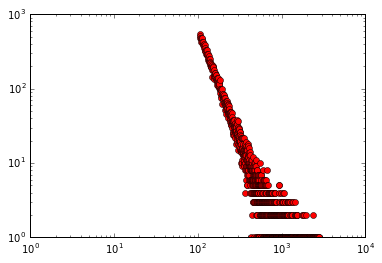

In [49]:
bagdh = nx.degree_histogram(bag)
plt.xscale("log")
plt.yscale("log")
plt.plot(bagdh, "ro")

We can see here that the preferential attachment model did the best at approximating the degree distribution when compared to the Erdos-Renyi and Small-World models, but it's still not spot on. We see a line on the log-log plot, but the slope is too steep and the starting point has to start at the value we assigned to $m$. So in approximating the degree distribution, we've gotten closer, but we're not quite there. 

## Average Clustering Coefficient

In [50]:
average_clustering(bag, trials=10000)

0.0279

The Barabasi-Albert model significantly underestimates the clustering coefficient.

## Average Shortest Path Length

In [51]:
estimate_asp(bag)

2.17571

This model slightly overshoots the average shortest path length, but not by a very wide margin. 

# Conclusions

We discussed three network models, that postulate how a network is formed following a set of very simple and rigid rules. The small-world network approximated our real-world network's clustering coefficient and shortest path length, but the distribution of degrees was off. The preferential attachment model captured the pattern in the degree distribution, but missed the clustering coefficient. 

We must always keep in mind that models are illuminating, but never perfect imitations of the real world. Clearly, the way that people become friends on Facebook or follow other users on Tweets is a very complicated, human process. However, baseed on our exploration today, we can say that in aggregate, there is a *degree* of randomisity in relationship formation, that the idea that people have a "core" of connections to begin with as in the Small-World model holds merit, and that there is some sort of influence of preferential attachment, whereby Tweeters or Facebook users with more connections are likely to garner even more.